In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 模擬產生路徑

In [44]:
import random

for i in xrange(5):
    print '%04.3f' % random.random()

0.602
0.399
0.858
0.069
0.330


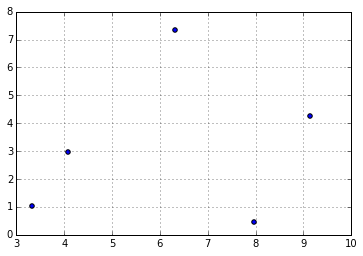

In [45]:
import matplotlib.pyplot as plt

x = []
y = []
for i in xrange(5):
    x.append(random.random()*10)

for i in xrange(5):
    y.append(random.random()*10)
    
fig = plt.figure()
ax = fig.gca()
plt.scatter(x,y)
plt.grid()
plt.show()

In [46]:
import matplotlib.pyplot as plt

path = [[0,0], [1,0], [1,1], [2,1], [2,2], [3,2]]

for x,y in path:
    print x +random.random(), y + random.random()

0.199595956956 0.131750314877
1.4780337031 0.858558494939
1.78218449382 1.93663950426
2.39203990102 1.76348307762
2.53139508954 2.95361786522
3.90891264502 2.06424819529


In [47]:
import matplotlib.pyplot as plt

xcoord = []
ycoord = []
path = [[0,0], [1,0], [1,1], [2,1], [2,2], [3,2]]

for x,y in path:
    xcoord.append(x +random.random())
    ycoord.append(y + random.random())


In [48]:
print xcoord, ycoord

[0.509453873073536, 1.5216314118263194, 1.2709686390075539, 2.382759307559087, 2.9336926457637675, 3.141413976060273] [0.3961814475105282, 0.4214660002064037, 1.9978843529207082, 1.6604836487057453, 2.1556569432896096, 2.286569877419582]


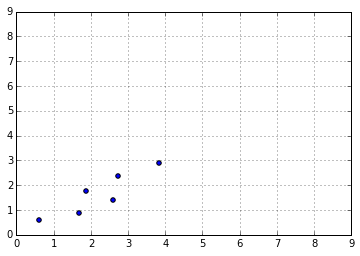

In [22]:
fig = plt.figure()
ax = fig.gca()
plt.scatter(xcoord,ycoord)
ax.set_xticks(range(0,10,1))
ax.set_yticks(range(0,10,1))
plt.grid()
plt.show()

In [79]:
paths = [ [[0,0], [0,1], [0,2], [0,3], [1,3], [1,4]] ,
          [[0,0], [1,0], [1,1], [2,1], [2,2], [3,2]] ,
          [[0,0], [1,0], [2,0], [3,0], [4,0]]
        ]

print len(paths)

3


In [80]:
def genCoords(path):
    coord = []
    for x,y in path:
        coord.append([x +random.random(), y + random.random()])
    return coord

In [81]:
user = []
xcoord = []
ycoord = []
for i in range(1,100):
    for x,y in genCoords(random.choice(paths)):
        user.append(i)
        xcoord.append(x)
        ycoord.append(y)

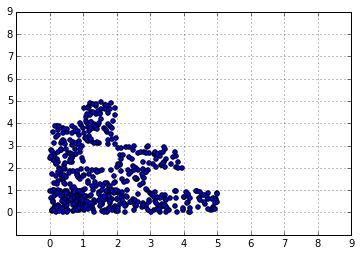

In [82]:
fig = plt.figure()
ax = fig.gca()
plt.scatter(xcoord,ycoord)
ax.set_xticks(range(0,10,1))
ax.set_yticks(range(0,10,1))
plt.grid()
plt.show()

## 建立空間索引 (Spatial Hash)

In [83]:
def nodeConversion(x,y,cell_size):
    return (
            int((math.floor(x/cell_size))*cell_size),
            int((math.floor(y/cell_size))*cell_size)
        )

In [84]:
print nodeConversion(1.2,0.2,1)

(1, 0)


In [85]:
points = []

x_proj = []
y_proj = []

for i in range(0,len(xcoord)):
    x,y =  nodeConversion(xcoord[i], ycoord[i],1)
    #print user[i], x, y

In [86]:
user_path = {}

for i in range(0,len(xcoord)):
    x,y =  nodeConversion(xcoord[i], ycoord[i],1)
    if user[i] not in user_path:
        user_path[user[i]] = [(x,y)]
    else:
        user_path[user[i]].append((x,y))

In [87]:
print user_path

{1: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 2: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 3: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 4: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 5: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 6: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 7: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2)], 8: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 9: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 10: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 11: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 12: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 13: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2)], 14: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 15: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2)], 16: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 17: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)], 18: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2)], 19: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], 20: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (

In [94]:
trajectory = []
for key in user_path:
    trajectory.append(tuple(user_path[key]))

In [95]:
#print tuple(trajectory)

## 樣式探勘

In [118]:
from pymining import seqmining
freq_seqs = seqmining.freq_seq_enum(tuple(trajectory), 5)
for path in freq_seqs:
    if len(path[0]) >= 5:
        print path


(((0, 0), (1, 0), (1, 1), (2, 1), (3, 2)), 26)
(((0, 0), (0, 1), (0, 2), (0, 3), (1, 4)), 36)
(((0, 0), (1, 0), (2, 0), (3, 0), (4, 0)), 37)
(((0, 0), (1, 0), (1, 1), (2, 1), (2, 2)), 26)
(((0, 0), (0, 2), (0, 3), (1, 3), (1, 4)), 36)
(((0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2)), 26)
(((1, 0), (1, 1), (2, 1), (2, 2), (3, 2)), 26)
(((0, 1), (0, 2), (0, 3), (1, 3), (1, 4)), 36)
(((0, 0), (1, 0), (1, 1), (2, 2), (3, 2)), 26)
(((0, 0), (0, 1), (0, 2), (1, 3), (1, 4)), 36)
(((0, 0), (0, 1), (0, 3), (1, 3), (1, 4)), 36)
(((0, 0), (1, 1), (2, 1), (2, 2), (3, 2)), 26)
(((0, 0), (1, 0), (2, 1), (2, 2), (3, 2)), 26)
(((0, 0), (0, 1), (0, 2), (0, 3), (1, 3)), 36)
(((0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4)), 36)


## 產生連接圖

In [121]:
import networkx as nx

graph = nx.Graph()

for path in freq_seqs:
    ele = path[0]
    if len(ele) >= 2:
        for i in range(0, len(ele) - 1):
            if abs(ele[i+1][0] - ele[i][0]) +  abs(ele[i+1][1] - ele[i][1]) <= 1:
                graph.add_edge(ele[i], ele[i+1],duration=1)


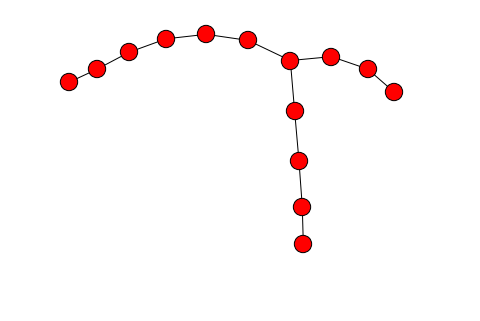

In [122]:
nx.draw(graph)

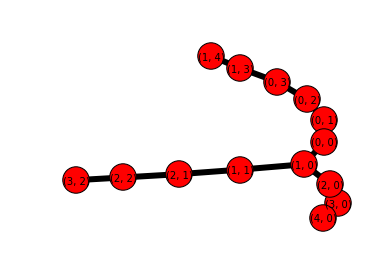

In [123]:
# positions for all nodes
pos=nx.spring_layout(graph) 

# nodes
nx.draw_networkx_nodes(graph,pos,node_size=700)

# edges
nx.draw_networkx_edges(graph,pos, width=6)


# labels
nx.draw_networkx_labels(graph,pos,font_size=10,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [1]:
import datetime
import os
import pandas

seattle_fire_responses = pandas.read_csv('0203.csv', parse_dates=[
    'Datetime'
], usecols=[
    'Address',
    'Type',
    'Datetime',
    'Latitude',
    'Longitude',
    'Incident Number',
]).dropna()
len(seattle_fire_responses)

C:\Python27\lib\site-packages\dateutil\parser.py:428: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


332

In [2]:
seattle_fire_response_locations = seattle_fire_responses[
    ['Longitude', 'Latitude']].values
seattle_fire_responses[:2]

,Address,Type,Datetime,Latitude,Longitude,Incident Number
0,4th Av N / Mercer St,Aid Response,2014-02-03 23:56:00,47.624564,-122.348877,F140012355
1,2121 8th Av,Aid Response,2014-02-03 23:47:00,47.616647,-122.338160,F140012352


## http://www.spatialreference.org/

In [3]:
from geometryIO import get_transformPoint, proj4LL

# http://spatialreference.org/ref/epsg/2855/
proj4_washington_north = (
    '+proj=lcc +lat_1=48.73333333333333 +lat_2=47.5 +lat_0=47 '
    '+lon_0=-120.8333333333333 +x_0=500000 +y_0=0 +ellps=GRS80 +units=m +no_defs ')
transform_point = get_transformPoint(proj4LL, proj4_washington_north)
untransform_point = get_transformPoint(proj4_washington_north, proj4LL)
print tuple(seattle_fire_response_locations[0])
print untransform_point(*transform_point(*seattle_fire_response_locations[0]))

(-122.348877, 47.624563999999999)
(-122.348877, 47.624563999983344)


In [4]:
import numpy as np

seattle_fire_response_xys = np.array([
    transform_point(*_) for _ in seattle_fire_response_locations])
seattle_fire_response_xys[:2]

array([[ 386093.63374589,   70561.88624272],
       [ 386881.79616456,   69666.03052991]])

In [5]:
from scipy.spatial import KDTree

def rate_hotspots(hotspot_xys, client_xys, radius_in_meters):
    covered_count = 0
    summed_distance = 0
    try:
        hotspot_kdtree = KDTree(hotspot_xys)
    except ValueError:
        return 0
    for client_xy in client_xys:
        hotspot_distances, hotspot_indices = hotspot_kdtree.query(
            client_xy, 1)
        if hotspot_distances < radius_in_meters:
            covered_count += 1
        summed_distance += hotspot_distances
    return covered_count / float(summed_distance)

radius_in_meters = 800
rate_hotspots(seattle_fire_response_xys[:10], seattle_fire_response_xys, radius_in_meters)

0.00018110725534360492

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from scipy.spatial.distance import euclidean

def get_distance_in_degrees(xy, distance_in_meters):
    location1 = untransform_point(*xy)
    location2 = untransform_point(xy[0] + distance_in_meters, xy[1])
    return euclidean(location1, location2)

get_distance_in_degrees(seattle_fire_response_xys[0], distance_in_meters=800)

0.01064235044280993

C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


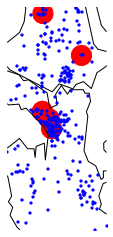

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from shapely.geometry import MultiPoint

def plot_hotspots(hotspot_xys, client_xys, radius_in_meters):
    hotspot_locations = np.array([untransform_point(*_) for _ in hotspot_xys]) 
    client_locations = np.array([untransform_point(*_) for _ in client_xys])
    llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat = MultiPoint(client_locations).bounds
    m = Basemap(
        llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat, resolution='h', projection='tmerc',
        lon_0=np.mean([llcrnrlon, urcrnrlon]),
        lat_0=np.mean([llcrnrlat, urcrnrlat]))
    m.drawcoastlines()
    radius_in_degrees = get_distance_in_degrees(client_xys[0], radius_in_meters)
    for hotspot_location in hotspot_locations:
        m.tissot(*hotspot_location, radius_deg=radius_in_degrees, npts=15, color='r')
    m.scatter(client_locations[:, 0], client_locations[:, 1],
        color='b', latlon=True, marker='.', zorder=10)
    plt.axis('off')

hotspots_via_random = seattle_fire_response_xys[:5]
plot_hotspots(hotspots_via_random, seattle_fire_response_xys, radius_in_meters)

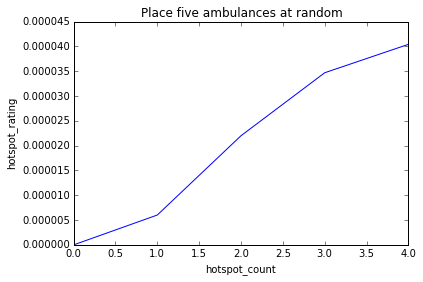

In [9]:
def plot_rating_vs_count(title, hotspot_xys):
    hotspot_counts = xrange(len(hotspot_xys))
    hotspot_ratings = []
    for hotspot_count in hotspot_counts:
        hotspot_ratings.append(rate_hotspots(
            hotspot_xys[:hotspot_count], seattle_fire_response_xys, radius_in_meters))
    plt.plot(hotspot_counts, hotspot_ratings)
    plt.xlabel('hotspot_count')
    plt.ylabel('hotspot_rating')
    plt.title(title)
    return hotspot_ratings

hotspots_via_random_ratings = plot_rating_vs_count(
    'Place five ambulances at random', hotspots_via_random)

In [10]:
import numpy as np

def place_hotspot_via_mean(xys):
    return np.mean(xys, axis=0)

place_hotspot_via_mean(seattle_fire_response_xys)

array([ 387649.22387623,   70446.07270113])

In [11]:
from scipy.optimize import fmin_bfgs
from scipy.spatial.distance import euclidean

def sum_distances_from_hotspot(hotspot_xy, client_xys):
    return sum(euclidean(hotspot_xy, _) for _ in client_xys)

def price_hotspot_via_distance(hotspot_xy, client_xys):
    summed_distance = sum_distances_from_hotspot(hotspot_xy, client_xys)
    return summed_distance

def place_hotspot_via_bfgs(xys):
    return fmin_bfgs(price_hotspot_via_distance, xys[0], args=(xys,), disp=0)

def place_and_price_hotspot(
        client_xys, place_hotspot, price_hotspot=price_hotspot_via_distance):
    hotspot_xy = place_hotspot(client_xys)
    return price_hotspot(hotspot_xy, client_xys)

print place_and_price_hotspot(seattle_fire_response_xys, place_hotspot_via_mean)
print place_and_price_hotspot(seattle_fire_response_xys, place_hotspot_via_bfgs)

1750875.42005
1717521.5521


In [12]:
def price_hotspot_via_distance_over_count(hotspot_xy, client_xys):
    summed_distance = sum_distances_from_hotspot(hotspot_xy, client_xys)
    client_count = len(client_xys)
    return summed_distance / float(client_count)

print place_and_price_hotspot(
    seattle_fire_response_xys, place_hotspot_via_mean, price_hotspot_via_distance_over_count)
print place_and_price_hotspot(
    seattle_fire_response_xys, place_hotspot_via_bfgs, price_hotspot_via_distance_over_count)

5273.72114473
5173.25768705


0.000017


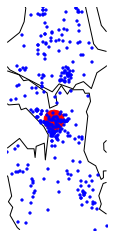

In [13]:
hotspots_via_single = hotspot_xys = [place_hotspot_via_bfgs(seattle_fire_response_xys)]
plot_hotspots(hotspot_xys, seattle_fire_response_xys, radius_in_meters)
print '%f' % rate_hotspots(hotspot_xys, seattle_fire_response_xys, radius_in_meters)

In [14]:
from itertools import combinations
from scipy.spatial.distance import euclidean

def get_diameter(xys):
    diameter = 0
    for xy1, xy2 in combinations(xys, 2):
        distance = euclidean(xy1, xy2)
        if distance > diameter:
            diameter = distance
    return diameter

get_diameter(seattle_fire_response_xys)

26657.061209676896

In [15]:
from sklearn.cluster import KMeans

def split_group(xys, split_count=2):
    model = KMeans(n_clusters=split_count)
    model.fit(xys)
    return [xys[model.labels_ == _] for _ in xrange(split_count)]

len(split_group(seattle_fire_response_xys))

2

hotspot_count = 63
hotspot_rating = 0.00238600216535


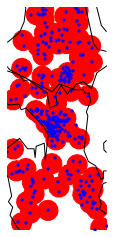

In [16]:
import numpy as np

def yield_hotspot_via_split(xys, radius_in_meters):
    diameter_in_meters = radius_in_meters * 2
    groups = [xys]
    hotspot_packs = []
    while groups:
        group = groups.pop(0)
        if get_diameter(group) > diameter_in_meters:
            groups.extend(split_group(group))
            continue    
        hotspot_xy = place_hotspot_via_mean(group)
        hotspot_price = price_hotspot_via_distance_over_count(hotspot_xy, group)
        hotspot_packs.append((hotspot_price, hotspot_xy))
    for hotspot_price, hotspot_xy in sorted(hotspot_packs, key=lambda x: x[0]):
        yield hotspot_xy
        
hotspots_via_split = hotspot_xys = list(yield_hotspot_via_split(
    seattle_fire_response_xys, radius_in_meters))
print 'hotspot_count = %s' % len(hotspot_xys)
print 'hotspot_rating = %s' % rate_hotspots(
    hotspot_xys, seattle_fire_response_xys, radius_in_meters)
plot_hotspots(hotspot_xys, seattle_fire_response_xys, radius_in_meters)

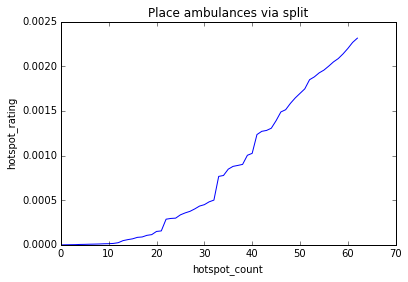

In [17]:
hotspots_via_split_ratings = plot_rating_vs_count(
    'Place ambulances via split', hotspots_via_split)

In [47]:
a = [1,2,3]
a.remove(1)
print a


[2, 3]


hotspot_count = 102
hotspot_rating = 0.0039797274519


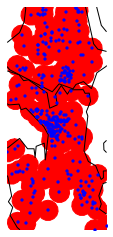

In [51]:
def yield_hotspot_via_rank(xys, radius_in_meters):
    pending_indices = np.arange(len(xys))
    while len(pending_indices):
        pending_xys = xys[pending_indices]        
        pending_tree = KDTree(pending_xys)        
        least_hotspot_price, least_hotspot_xy, least_indices = np.inf, None, []
        for pending_index in pending_indices:
            xy = xys[pending_index]
            selected_indices = pending_tree.query_ball_point(xy, radius_in_meters)            
            selected_xys = pending_xys[selected_indices]
            # Price hotspot
            hotspot_price = price_hotspot_via_distance_over_count(xy, selected_xys)
            if hotspot_price > least_hotspot_price:
                continue
            least_hotspot_price = hotspot_price
            least_hotspot_xy = xy
            least_indices = pending_indices[selected_indices]
        yield least_hotspot_xy
        pending_indices = np.array(list(set(pending_indices) - set(least_indices)))

hotspots_via_rank = hotspot_xys = list(yield_hotspot_via_rank(
    seattle_fire_response_xys, radius_in_meters))
print 'hotspot_count = %s' % len(hotspot_xys)
print 'hotspot_rating = %s' % rate_hotspots(
    hotspot_xys, seattle_fire_response_xys, radius_in_meters)
plot_hotspots(hotspot_xys, seattle_fire_response_xys, radius_in_meters)

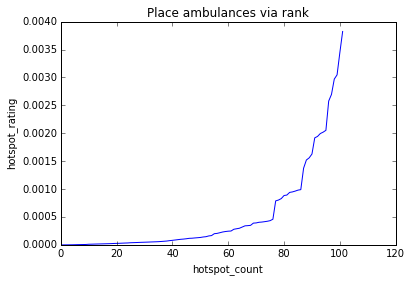

In [52]:
hotspots_via_rank_ratings = plot_rating_vs_count(
    'Place ambulances via rank', hotspots_via_rank)

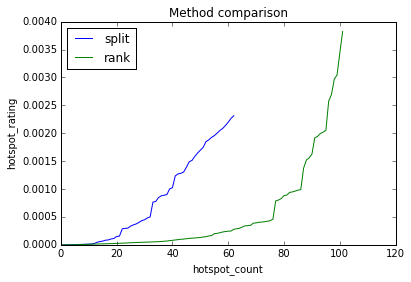

In [53]:
technique_packs = [
    ('split', hotspots_via_split_ratings),
    ('rank', hotspots_via_rank_ratings),
]
hotspot_counts = range(max(len(_[1]) for _ in technique_packs))
for technique_name, technique_ratings in technique_packs:
    plt.plot(
        hotspot_counts[:len(technique_ratings)], technique_ratings, label=technique_name)
plt.xlabel('hotspot_count')
plt.ylabel('hotspot_rating')
plt.title('Method comparison')
plt.legend(loc='upper left');